# Word2Vec Unigram Testing

This Python Notebook is used for evaluation of the Word2Vec Unigram model. The section is broken down as follows:

- Find most similar words from the selected word
- Perform Syntactic Analysis
- Perform Semantic Analysis
- Find uncommon word among a list of words
- Find cosine similarity among two words
- Find the frequency count of a word
- Check if a word is in the model
- Feature vectors of a certain word
- Visualisation of words in Vector Space using TSNE and PCA
- Histogram to showcase distribution of words

In [1]:
from gensim.models import Word2Vec as w2v

C:\Users\MyPC\Anaconda3\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\MyPC\Anaconda3\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
# Load Unigram model
FILE = "C:/Users/MyPC/Desktop/Vegito/W2V Models/w2v_reddit_unigram_300d.bin"
model = w2v.load_word2vec_format(FILE, binary=True)

In [3]:
# Cell to find most similar words 
# One word for unigram: dragon, bleach, tottenham
# Two words for bigram: dragon_ball, barack_obama (UNDERSCORE NEEDED + BIGRAM MODEL LOADED)
model.most_similar("wonderful", topn=10)

[('lovely', 0.8085933923721313),
 ('fantastic', 0.7471336126327515),
 ('delightful', 0.7442687153816223),
 ('wonderfull', 0.7259145379066467),
 ('terrific', 0.7138451337814331),
 ('great', 0.7117751240730286),
 ('beautiful', 0.7004677653312683),
 ('marvellous', 0.6963402628898621),
 ('marvelous', 0.6962117552757263),
 ('amazing', 0.6880980134010315)]

In [4]:
# Cell for semantic evaluation (Ex. King - man + woman is approximately equal to queen)
model.most_similar(positive=["tokyo","malaysia"], negative=["japan"])

[('lumpur', 0.6737101674079895),
 ('kuala', 0.6668090224266052),
 ('taipei', 0.6401477456092834),
 ('bangkok', 0.6113026142120361),
 ('penang', 0.5809809565544128),
 ('lampur', 0.5752942562103271),
 ('toyko', 0.5550657510757446),
 ('selangor', 0.5511509776115417),
 ('singapore', 0.5502724647521973),
 ('mumbai', 0.5481346249580383)]

In [5]:
# Cell for syntactic evaluation (Ex. walking - walk + swim is approximately equal to swimming)
model.most_similar(positive=["greenish","blue"], negative=["green"])

[('blueish', 0.7298511266708374),
 ('greyish', 0.7232707738876343),
 ('bluish', 0.7149738669395447),
 ('pinkish', 0.705883264541626),
 ('purplish', 0.7028074264526367),
 ('brownish', 0.6946163773536682),
 ('grayish', 0.6922476887702942),
 ('reddish', 0.6911346316337585),
 ('yellowish', 0.6770833134651184),
 ('whitish', 0.6669460535049438)]

In [6]:
# Cell to check which word doesn't match among a group of words
model.doesnt_match("blue green yellow apple".split())

'apple'

In [7]:
# Cell to check similarity among two words
model.similarity("squats","legpress")

0.72445395334591289

In [8]:
# Count number of times a specific word occured in the 2015 Dataset
word = model.vocab['difu']
type(word.count)

int

In [9]:
# Check if word (Unigram) is in model. It is case-sensitive
'Dragon' in model

False

In [10]:
# What does each word actually contain?
model['goku']

array([ 0.10375531,  0.10929207,  0.08830469,  0.01395523, -0.01517171,
        0.00501317, -0.06046121,  0.02743253,  0.02918806,  0.03573068,
       -0.01970761, -0.01276298, -0.02046086,  0.03802621,  0.00047961,
       -0.0017624 , -0.06191385, -0.05035397,  0.08013493, -0.05448005,
       -0.04873396,  0.01874197, -0.06683715, -0.07103707, -0.01683106,
        0.0146693 , -0.06659026, -0.01451557, -0.02147384,  0.00971734,
       -0.03524466, -0.08246868, -0.12978971, -0.04906649, -0.04533923,
        0.13329028,  0.0016056 ,  0.02454429,  0.07700373,  0.03213641,
       -0.03062899,  0.07740682,  0.15522739, -0.00674924, -0.05913823,
       -0.01185566, -0.0377803 , -0.03675865, -0.00894851,  0.06692838,
       -0.04187158,  0.05098331, -0.06255441,  0.03872509, -0.04266021,
        0.08426074,  0.02840355, -0.06466481, -0.04299739, -0.04460176,
        0.01159275, -0.03719337, -0.0315008 , -0.04088448, -0.0624588 ,
       -0.14078555,  0.0181028 ,  0.00725325,  0.13781574,  0.13

In [11]:
# Visualisation (Normal) using TSNE and PCA
# Motivation: http://lvdmaaten.github.io/tsne/
# Motivation: https://golog.co/blog/article/Visualising_high-dimensional_datasets_using_PCA_and_tSNE
# Video: https://www.youtube.com/watch?v=RJVL80Gg3lA

# Firstly: Import the libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import mpld3

np.random.seed(7)
sns.set_style("white")

%matplotlib inline

In [12]:
# Create function to return list of words and word embeddings
import random
import pickle

def getEmbeddings(cluster_file, N, word):
    
    # Specify path
    FILE_DICT = "C:/Users/MyPC/Desktop/Vegito/Word Dictionaries/dict_" + str(cluster_file) + "C.pk"
    FILE_CLUS = "C:/Users/MyPC/Desktop/Vegito/K-Means Models/full_" + str(cluster_file) + "C.pk"
    
    # Load the files using pickle
    array_dict_cluster = pickle.load(open(FILE_DICT, "rb"))
    word_centroid_map =  pickle.load(open(FILE_CLUS,"rb"))
    
    # Find index number of word 
    # Then load all related words 
    cluster_num = word_centroid_map[word]
    words_list = array_dict_cluster[cluster_num]['word_list']
    
    # Get index number of searched word
    index_num = words_list.index(word)
    
    # Memory limitations
    if index_num < N:
    
        # Lets get only the first N + 10number of words
        words_list = words_list[:N + 10]
        
    else:
        
        # Get the previous N words 
        words_list = words_list[index_num - N : index_num + 10]
    
    # Initialize array of vectors and words
    vectors = []
    words = []
    
    # Add vector and words
    for word in words_list:
        
        vectors.append(model[word]) 
        words.append(word)
    
    return vectors, words

In [13]:
# Plot a graph to show variance in PCA
def plotPCABar(explained_variance_ratio, threshold):
    
    # Get number of components needed above ratio
    n_comp = 0
    total = 0
    
    for num in explained_variance_ratio:
        if total > threshold:
            break
        else:
            n_comp += 1
            total += num
            
    # Prepare label for vertical line
    label = str(threshold) + '% Variance (' + str(n_comp) + ')'
    
    # Get number of bars to plot
    bar_num = len(explained_variance_ratio)
    
    # Plot using matplotlib
    fig, ax = plt.subplots(figsize=(8, 3))

    ax.plot(range(bar_num), explained_variance, alpha=1, color='red')
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    sns.despine()
    
    ax.set_ylabel(ylabel = 'Explained variance ratio', labelpad=20)
    ax.set_xlabel(xlabel = 'Component', labelpad=20)
    ax.set_xlim([0, bar_num])
    
    fig.tight_layout()

In [14]:
# Function to plot PCA's variance
def plotPCAPlot(wv):
    
    # Use all components (this is the number of dimensions in Word2Vec)
    pca = PCA(n_components = 300)
    pca_result = pca.fit_transform(wv)
    
    # Get explained variance per component
    explained_variance = np.multiply(pca.explained_variance_ratio_, 100.0)
    
    # Get data from components
    n_comp = 0
    total = 0
    
    START = 10
    STOP = 91
    JUMP = 10
    
    y_target = range(START,STOP,JUMP) 
    index = 0
    
    x_val = [0]
    y_val = [0]

    # Loop through
    for num in explained_variance:
            n_comp += 1
            total += num

            # Store for every 20% and increment index
            if round(total) >= y_target[index]:
                
                x_val.append(n_comp)
                y_val.append(round(total))
                index += 1
                
            # 100% reached
            if index == len(y_target): break
        
    # Add last label
    x_val.append(300)
    y_val.append(100)
    
    # Tick Spacing
    tick_spacing = 10
    
    # Plotting 
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x_val, y_val, color='green')
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    # Remove first and last values
    del x_val[0], x_val[-1]
    del y_val[0], y_val[-1]
    ax.scatter(x_val, y_val, color='blue', s = 25)
    
    # Draw dashed lines
    for i, val in enumerate(x_val):
        
        # Vertical
        ax.vlines(x=val, ymin=0, ymax=y_val[i], color='blue', linestyles='dashed')
        
        # Horizontal
        ax.hlines(y=y_val[i], xmin=0, xmax=val, color='blue', linestyles='dashed')
    
    ax.set_ylabel(ylabel = 'Total Variance (%)', labelpad=20)
    ax.set_xlabel(xlabel = 'Total Principal components', labelpad=20)
    
    ax.set_xlim([0, 300])
    ax.set_ylim([0, 100])

In [15]:
# Plot heatmap of similar words
import random
import pandas as pd

def plotWordHeat(word, top_n, annotation, font_size):
    
    # Get the top 40 words of given word
    similar_words = model.most_similar(word, topn = top_n)
    words = [word for word, cos_distance in similar_words]
    
    # Get similarity score among words
    similarity_array = []
    count = 0
    
    # Compare one word with all words (Distributed)
    for i, first_word in enumerate(words):
        
        first_row = []
        
        for index in range(i+1):
                
            # Append the score
            score = model.similarity(first_word, words[index])
            first_row.append(round(score, 2))
            
        # Append the row
        similarity_array.append(first_row)
        count += 1
        
    # Convert to dataframe
    conf_df = pd.DataFrame(similarity_array, index = [word for word, cos_distance in similar_words],
                          columns = [word for word, cos_distance in similar_words])
    
    # Create Heatmap using Seaborne
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_xticklabels(rotation=90, labels=words)
    sns.heatmap(conf_df, vmin=0, vmax=1, cmap=plt.cm.jet, ax=ax, 
                annot=annotation, annot_kws={"size":font_size})

ENTER WORD: figure
TOTAL WORDS: 800 
TIME TAKEN (PCA):  0.5291707515716553
VARIANCE:  92.1194830983
TIME TAKEN (TSNE):  5.77177357673645


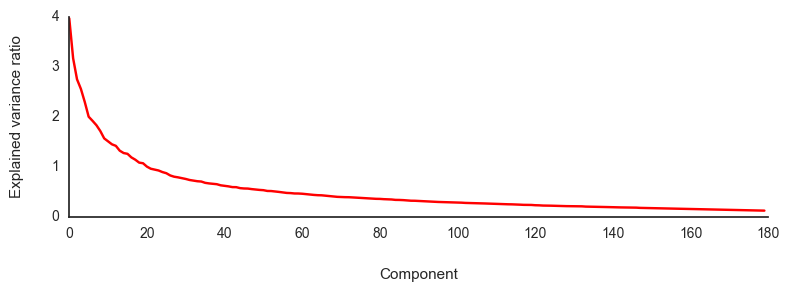

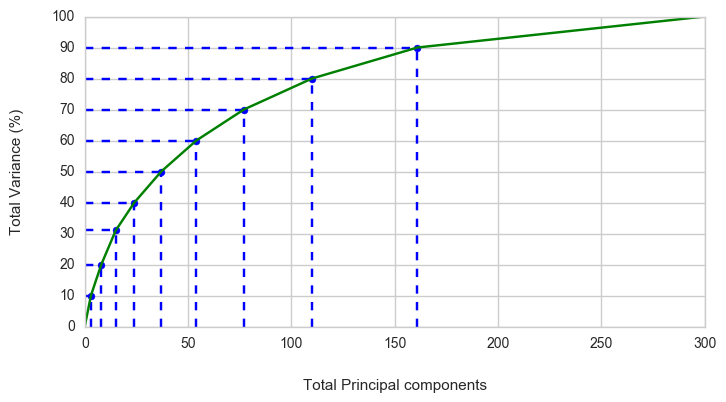

In [16]:
# Display the graph in this cell
import time

# Get the feature vectors and respective words
search_word = input("ENTER WORD: ").lower()
get_words = 790

wv, vocabulary = getEmbeddings(500, get_words, search_word)
print("TOTAL WORDS: %i " % (len(vocabulary)))

# Initialize PCA model
pca_comp = 180
pca = PCA(n_components=pca_comp)

start = time.time()
pca_result = pca.fit_transform(wv)
end = time.time()

threshold = 90 # 90 percent of variance is needed

# Explained variance
explained_variance=np.multiply(pca.explained_variance_ratio_, 100.0)
plotPCABar(explained_variance, threshold)

print("TIME TAKEN (PCA): ", end-start)

# Get explained variance ratio
explain_ratio = np.sum(pca.explained_variance_ratio_)
print('VARIANCE: ', explain_ratio * 100)

# Initialize TSNE model
tsne = TSNE(n_components=2, random_state=0)

# Fit with TSNE
start = time.time()
Y = tsne.fit_transform(pca_result)
end = time.time()

# Plot Full PCA, displaying variance
plotPCAPlot(wv)

print("TIME TAKEN (TSNE): ", end - start)

# Scatter points
fig, ax = plt.subplots(figsize=(10, 8),subplot_kw={'xticks': [], 'yticks': []})

# Use Scatterplot
ax.scatter(Y[:, 0], Y[:, 1], color="blue")

# Initialize Points
for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    
    # Give the searched word a different color
    # Otherwise, all words should be colored black
    color = 'black'
    fontsize = 10 #10 during presentation
    
    if label == search_word:
        color = 'red'
        fontsize = 20 #20 durin presentation
        
    ax.annotate(label, xy=(x, y), fontsize=fontsize, color=color)

# Display
mpld3.display(fig)

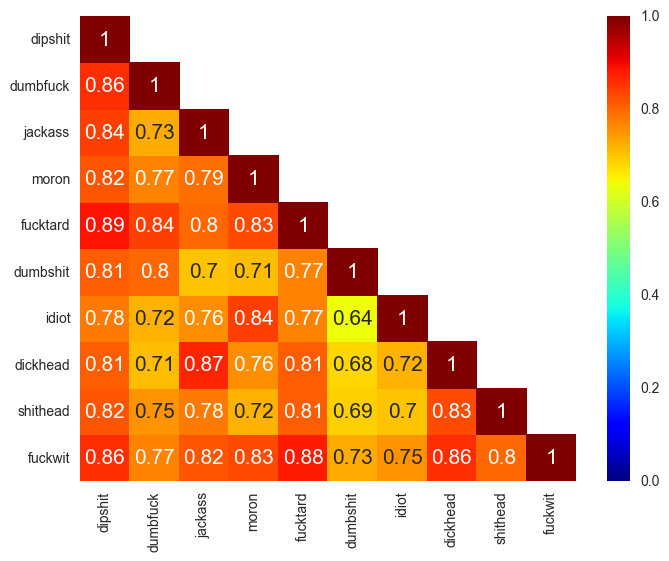

In [17]:
# Plot Heatmap from the vocabulary generated previously
search_word = 'dumbass'
top_n = 10
annotation = True
annot_font = 15

plotWordHeat(search_word, top_n, annotation, annot_font)

In [36]:
# Function to plot the histogram of word distribution

def plotHistogram(file_cluster):
    
    FILE_DICT = "C:/Users/MyPC/Desktop/Vegito/Word Dictionaries/dict_" + str(file_cluster) + "C.pk"
    array_dict_cluster = pickle.load(open(FILE_DICT, "rb"))

    word_length = []

    # Loop cluster by cluster
    for cluster in array_dict_cluster:

        # Get total words
        total_words = len(cluster['word_list'])

        # Append
        word_length.append(total_words)

    # Plot Histogram
    PADDING = 15
    
    # Get mean, median and mode 
    # Create labels
    
    avg_count = int(np.mean(word_length))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale=2)

    sns.distplot(word_length, kde=False, color='purple', label='Frequency Distribution')

    ax.grid(False)
    ax.set(title='Words Distribution in '+ str(file_cluster) + ' Clusters')
    
    plt.xlabel("Total Words", labelpad=PADDING)
    plt.ylabel("Total Clusters", labelpad=PADDING)
    
    plt.xlim(xmin=0)
    plt.tight_layout()

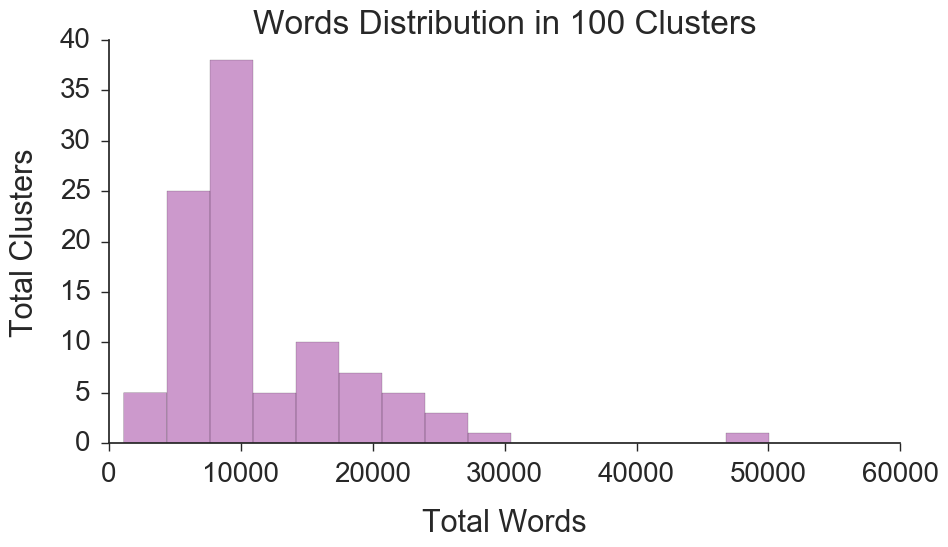

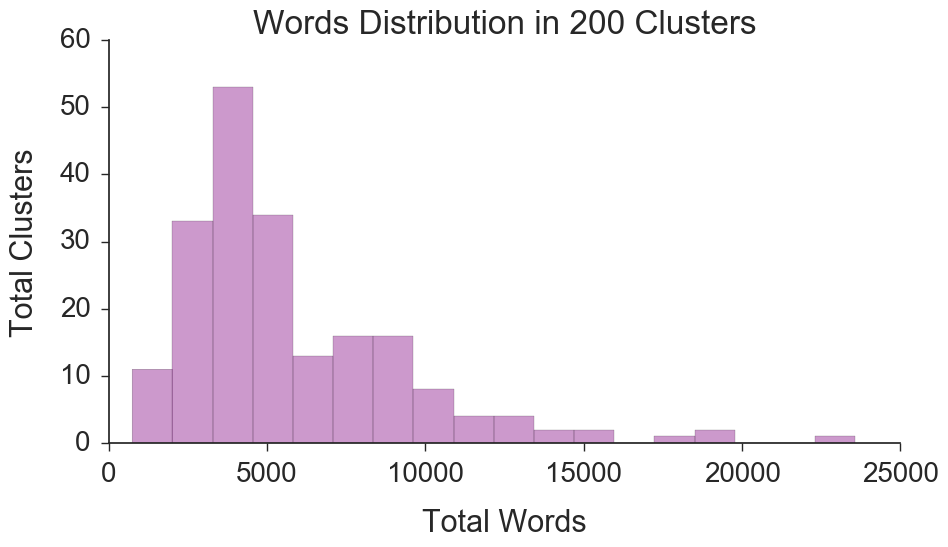

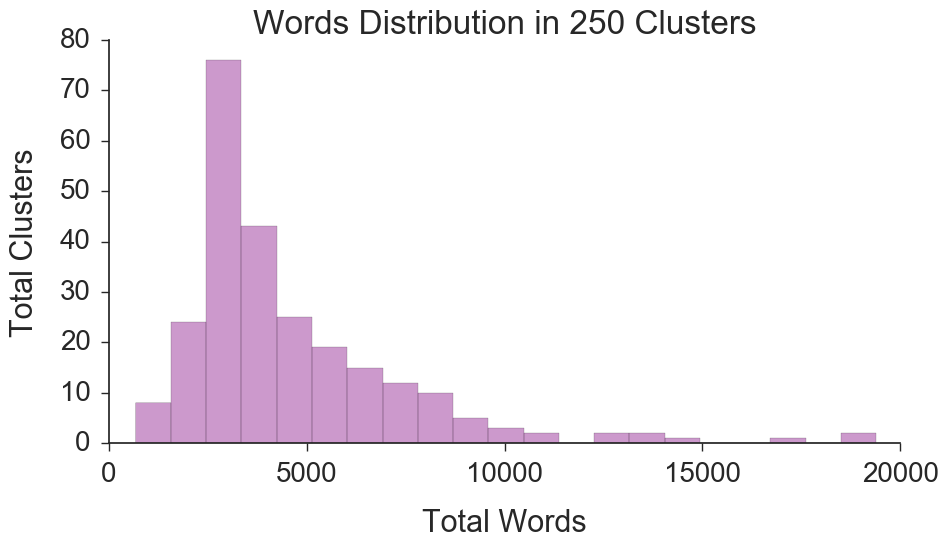

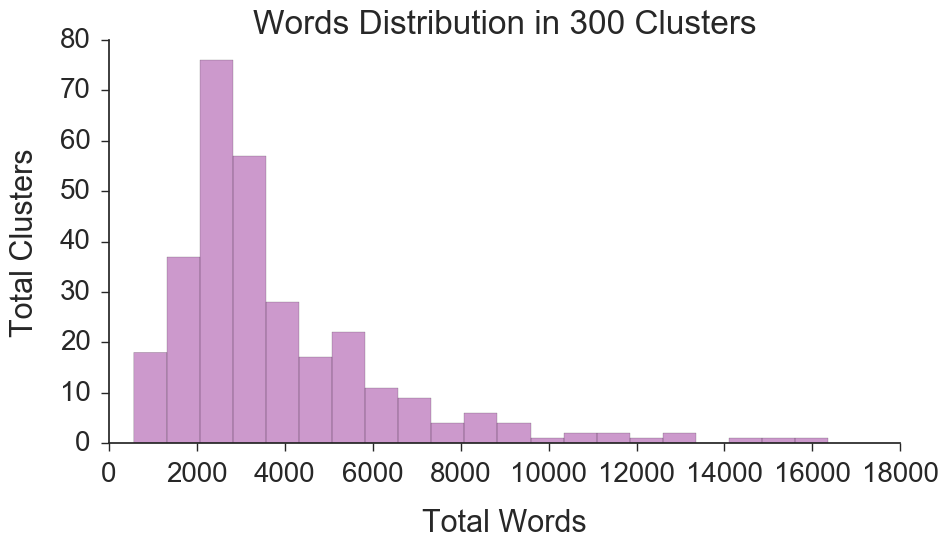

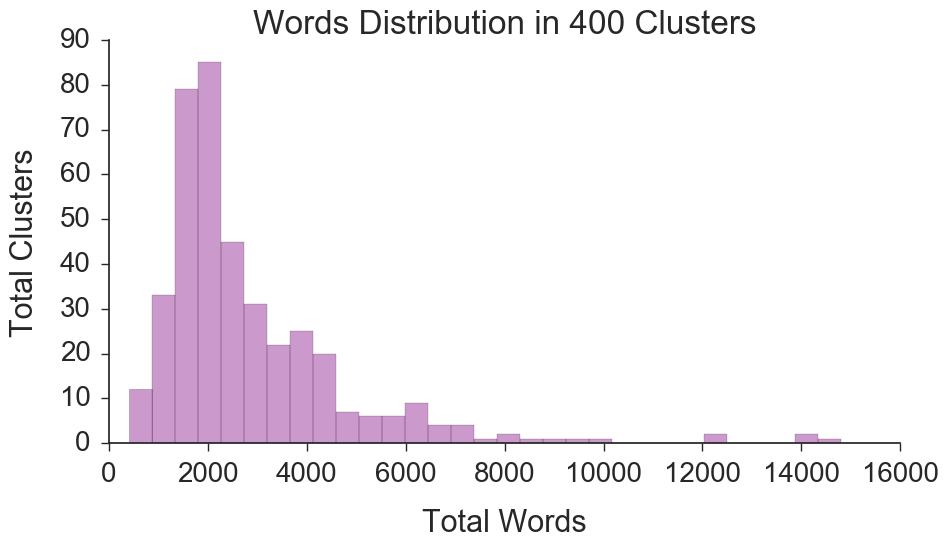

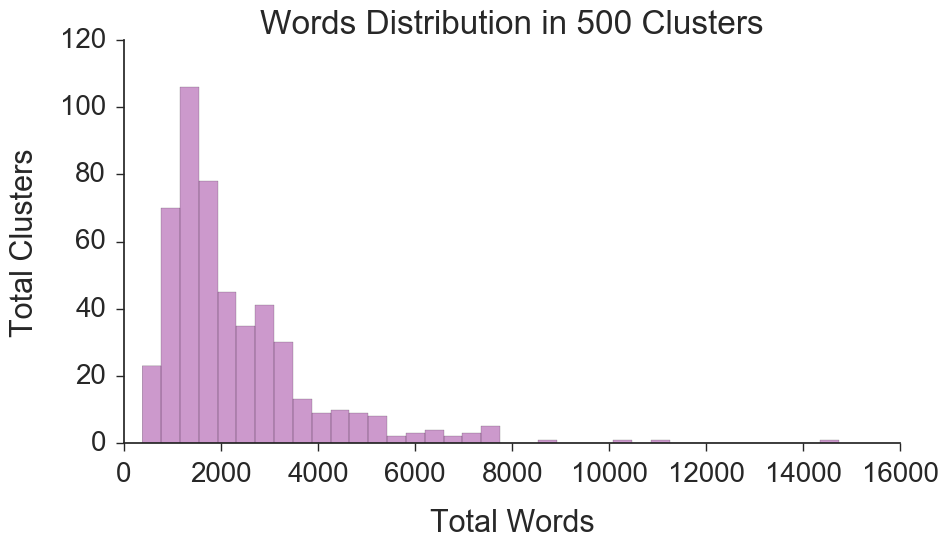

In [37]:
# Call histogram function plot the histograms
# Array to store number of clusters
clust_array = [100,200,250,300,400,500]

# Go one by one
for clusters in clust_array:
    
    # Call histogram function
    plotHistogram(clusters)
    sns.despine()
    plt.show()